# Week 2

## Python setup

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Exercises Part 1: Basic mathematical description of networks

Exercises: Chapter 2 in Network Science.

    Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?


#### Answer

Real networks are sparse since the number of potential links, L<sub>max</sub>, will be larger than the number of the connected links, L. A network is thus sparse, if L << L<sub>max</sub>. _Read << as much less_

An example of a real network is a social media like Facebook or Twitter, where a node is a person and the links are friend connections or follows. Each person can have many friends or follow a lot of other profiles, but in reality, this number is dwarfed by the number of every possible connection, i.e. L is much smaller than L<sub>max</sub>.

The network is sparse due to the size of the network and thereby the number of possible links being much larger than the actual number of links. This would be evident, if we had to chose between representing the network with a adjacency matrix or an edge list. The edge list would be much more memory efficient, hence the sparsety of the network. 

## Exercises Part 2: Exercises using the NetworkX library

### 2.1 Write the solution exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.

![ns_2_12_1](../images/ns_2_12_1_koningsberg_problem.png)

Which of the icons in the Image in 2.19 in the book can be drawn without raising your pencil from the paper, and without drawing any line more than once? Why? 

##### Answer:
As defined by Euler, such as path cannot exist on a graph that has more than two nodes with an odd number of links.

All of them except B can be drawn without lifting the pen. Since B has 4 nodes with each 3 links, Euler's condition is not met, and thus we are not able to draw it without lifting the pen.

### 2.2 Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. 
(You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use NetworkX, but simple pen and paper).

##### 2.2.1 Undirected graph (a)

In [2]:
# Create graph and add edges
G_a = nx.Graph()
G_a.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2)])
G_a.add_node(5)

In [3]:
# Give list of connected components within the graph
list(nx.connected_components(G_a))

[{1, 2, 3, 4, 6}, {5}]

In [4]:
# Print the size of the graph and number of edges
print(G_a)

Graph with 6 nodes and 7 edges


In [5]:
# Print list of edges
list(G_a.edges)

[(1, 4), (1, 3), (1, 6), (1, 2), (4, 2), (3, 2), (3, 6)]

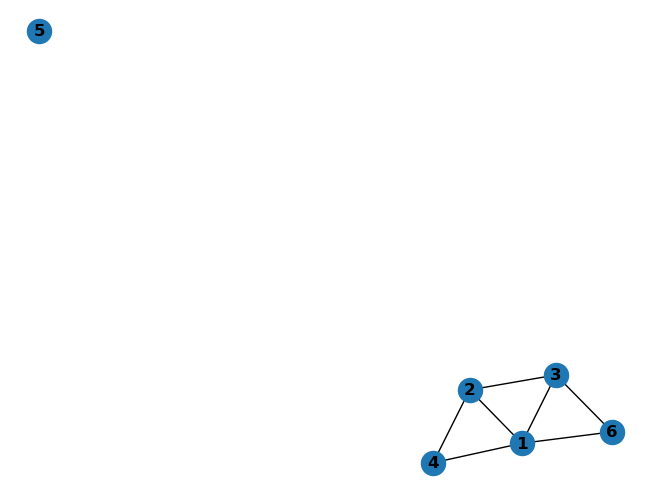

In [6]:
# Draw the graph
nx.draw(G_a, with_labels=True, font_weight='bold')

##### 2.2.2 Directed graph (b)

In [7]:
# Create graph and add edges
G_b = nx.DiGraph()
G_b.add_edges_from([
    (1,2), 
    (2,3), (2,4),
    (3,1), (3,2),
    (4,1),
    (6,1), (6,3)
])
G_b.add_node(5)

In [8]:
# Print list of edges
list(G_b.edges)

[(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]

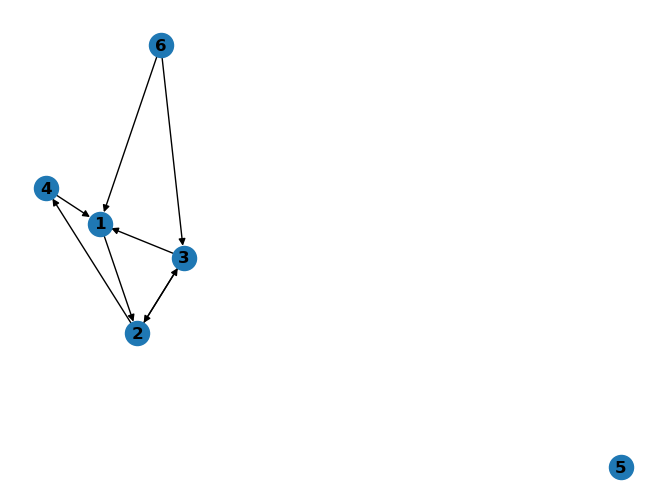

In [9]:
nx.draw(G_b, with_labels=True, font_weight='bold', arrows=True)

##### 2.2.3 The corresponding adjacency matrices.

In [10]:
# Adjacency matrix for (a)
A_a = nx.adjacency_matrix(G_a)
print(f"Adjacency list for (a):\n{A_a}")
print(f"Adjacency Matrix for (a):\n{A_a.todense()}")

Adjacency list for (a):
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 4)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
Adjacency Matrix for (a):
[[0 1 1 1 1 0]
 [1 0 0 0 1 0]
 [1 0 0 1 1 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 0 0]]


In [11]:
# Adjacency matrix for (b)
A_b = nx.adjacency_matrix(G_b)
print(f"Adjacency list for (b):\n{A_b}")
print(f"Adjacency Matrix for (b):\n{A_b.todense()}")

Adjacency list for (b):
  (0, 1)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (4, 0)	1
  (4, 2)	1
Adjacency Matrix for (b):
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


#### 2.2.4 The corresponding link lists

##### a) Built-in functions
There was a bit of confusion regarding the definition of 'Link list'. According to this [source](https://dshizuka.github.io/networkanalysis/02_dataformats.html#edge-list), an 'Edge list' is a vector with 2 columns, one for each node in a link. In networkX, we can create an edge list file, which can then be used to create graphs. However, the function does not account for nodes with no edges! Thus, node 6 is discarded which might not be 

In [12]:
# Save graph as a link list (called an edgelist)
nx.write_edgelist(G_a, "w02_2_2_4_a.edgelist")

# Create graph from edgelist file
G_a_2 = nx.read_edgelist("w02_2_2_4_a.edgelist", create_using=nx.Graph)

print(G_a_2)

Graph with 5 nodes and 7 edges


In [13]:
# Save graph as a link list (called an edgelist)
nx.write_edgelist(G_b, "w02_2_2_4_b.edgelist")

# Create graph from edgelist file
G_b_2 = nx.read_edgelist("w02_2_2_4_b.edgelist", create_using=nx.Graph)

print(G_b_2)

Graph with 5 nodes and 7 edges


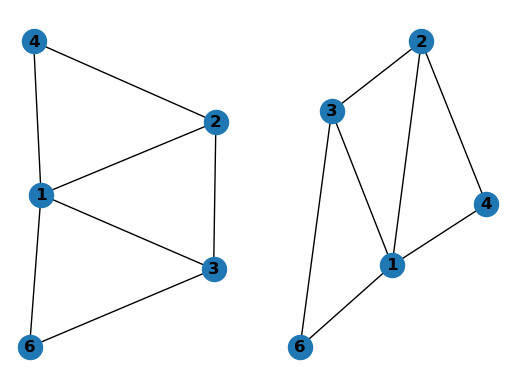

In [14]:
# Check that they look the same as the original graphs above
subax1 = plt.subplot(121)
nx.draw(G_a_2, with_labels=True, font_weight='bold', arrows=True)
subax2 = plt.subplot(122)
nx.draw(G_b_2, with_labels=True, font_weight='bold', arrows=True)

Then again, to avoid the loss of node 5, we could simply stick to the _Adjacency list_ given by the function `nx.adjacency_matrix(G)`. 

See the answer to 2.2.3.

##### a) Linked list interpretation
If we were to understand the term _'link list'_ as _'linked list'_ from computer science, then we could implement a class and accompanying functions for representing the data type:

In [15]:
import networkx as nx

# Create the directed graph
G = nx.DiGraph()
G.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (2, 3), (6, 3), (4, 2)])
G.add_node(5)

# Define the linked list node class
class LinkedListNode:
    def __init__(self, value):
        self.value = value
        self.next = None

# Function to convert a graph's adjacency list to a linked list for each node
def graph_to_linked_list(graph):
    linked_list_dict = {}

    for node in graph.nodes:
        # Create the head of the linked list for this node
        if node not in linked_list_dict:
            linked_list_dict[node] = LinkedListNode(node)
        
        head = linked_list_dict[node]
        current = head
        
        # For each successor (neighbor) of the node, create a linked list node
        for neighbor in graph.successors(node):
            new_node = LinkedListNode(neighbor)
            current.next = new_node
            current = current.next

    return linked_list_dict

# Convert the directed graph to linked lists
linked_lists = graph_to_linked_list(G)

# Function to print linked list
def print_linked_list(node):
    current = node
    while current:
        print(f"{current.value} -> ", end="")
        current = current.next
    print("None")

# Print the linked list for each node
for node in linked_lists:
    print(f"Linked list for node {node}: ", end="")
    print_linked_list(linked_lists[node])


Linked list for node 1: 1 -> 4 -> 3 -> 6 -> 2 -> None
Linked list for node 4: 4 -> 2 -> None
Linked list for node 3: 3 -> 2 -> None
Linked list for node 6: 6 -> 3 -> None
Linked list for node 2: 2 -> 3 -> None
Linked list for node 5: 5 -> None


#### 2.2.5 The average clustering coefficient

The average clustering coefficient of a graph can be calculated using the build-in function.

In [16]:
G_a_avg_clustering = nx.average_clustering(G_a)

print(f"Average clustering coefficient for G_a: {round(G_a_avg_clustering, 4)}")

Average clustering coefficient for G_a: 0.6389


#### 2.2.6 Switching node 5 and 6 

By switching the edges of node 5 and 6, the adjacency matrix and link list will changed for every (x,y), where either x or y are 5 or 6. 

We were not able to find any build-in functions for this purpose, so we tried to create a function ourselves.

See the output below for context:

In [17]:
# Initialise the new graph
G_a_new = nx.Graph()

# Copy nodes and edges from original graph
G_a_new.add_nodes_from(G_a)
G_a_new.add_edges_from(G_a.edges)

In [18]:
# Define a function to swap the edges between two nodes in a graph
def swap_nodes(G, node_a, node_b):
    # Copy nodes and edges from original graph into placeholder
    G_new = nx.Graph()
    G_new.add_nodes_from(G)
    G_new.add_edges_from(G.edges)
    
    
    # Get the edges involving node_a and node_b
    edges_a = [(node_a, v) for v in G.neighbors(node_a)]
    edges_b = [(node_b, v) for v in G.neighbors(node_b)]
    
    # Remove the edges connected to node_a and node_b
    G_new.remove_edges_from(edges_a)
    G_new.remove_edges_from(edges_b)
    
    # Add edges back but swapped
    for u, v in edges_a:
        G_new.add_edge(node_b, v if v != node_b else node_a)
    for u, v in edges_b:
        G_new.add_edge(node_a, v if v != node_a else node_b)
    
    return G_new

In [19]:
# Get the neighbors (i.e., edges) of both nodes
def swap_nodes(G, node_a, node_b):
    # Copy nodes and edges from original graph into placeholder
    G_new = nx.Graph()
    G_new.add_nodes_from(G)
    G_new.add_edges_from(G.edges)
    
    neighbors_a = list(G_new.neighbors(node_a))
    neighbors_b = list(G_new.neighbors(node_b))
    
    # Remove edges connected to node_a and node_b
    for neighbor in neighbors_a:
        G_new.remove_edge(node_a, neighbor)
    for neighbor in neighbors_b:
        G_new.remove_edge(node_b, neighbor)
    
    # Reassign edges: all edges from node_a should go to node_b and vice versa
    for neighbor in neighbors_a:
        if neighbor != node_b:  # Avoid creating a self-loop
            G_new.add_edge(node_b, neighbor)
    for neighbor in neighbors_b:
        if neighbor != node_a:  # Avoid creating a self-loop
            G_new.add_edge(node_a, neighbor)
    
    return G_new

In [20]:
# Function call to create new graph with edges of 5 and 6 swapped
G_a_new = swap_nodes(G_a, 5, 6)

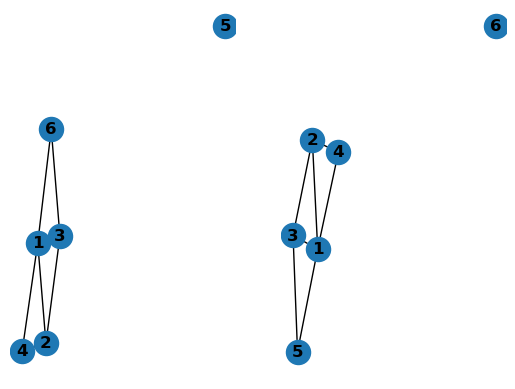

In [21]:
# Check that they look the same as the original graphs above
subax1 = plt.subplot(121)
nx.draw(G_a, with_labels=True, font_weight='bold', arrows=True)
subax2 = plt.subplot(122)
nx.draw(G_a_new, with_labels=True, font_weight='bold', arrows=True)

In [22]:
# Print edges of new and original graph
print(list(G_a.edges))
print(list(G_a_new.edges))

[(1, 4), (1, 3), (1, 6), (1, 2), (4, 2), (3, 2), (3, 6)]
[(1, 4), (1, 3), (1, 2), (1, 5), (4, 2), (3, 2), (3, 5)]


#### 2.2.7 What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

Since the two data representations contain the same information, they both tell us the same. However, the visual representation of the matrix offers some insight into the symmetry of the graph as well as quick overview to see if the graph is connected or unconnected.

![ns_2_15](../images/ns_2_15_disconnected_graph.jpg)

#### 2.2.8 In the networks, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3?

In [23]:
def find_paths_of_length_n(G, start, end, n):
    def dfs(current_node, current_path, current_length):
        # Base case: If the path length is n and we are at the end node
        if current_length == n:
            if current_node == end:
                paths.append(current_path[:])  # Record the path
            return
        
        # Explore neighbors
        for neighbor in G.neighbors(current_node):
            # Continue DFS if we haven't reached the desired path length
            current_path.append(neighbor)
            dfs(neighbor, current_path, current_length + 1)
            current_path.pop()  # Backtrack after exploring

    paths = []
    dfs(start, [start], 0)
    return paths

##### a)

In [24]:
# Find all paths from node 1 to node 3 of length 3
node_a = 1
node_b = 3
n = 3

all_paths = find_paths_of_length_n(G_a, node_a, node_b, n)

print(f"There are {len(all_paths)} possible paths between {node_a} and {node_b} with length {n}.")

# Output the paths
for path in all_paths:
    print(path)

There are 7 possible paths between 1 and 3 with length 3.
[1, 4, 1, 3]
[1, 4, 2, 3]
[1, 3, 1, 3]
[1, 3, 2, 3]
[1, 3, 6, 3]
[1, 6, 1, 3]
[1, 2, 1, 3]


##### b)

In [25]:
# Find all paths from node 1 to node 3 of length 3
node_a = 1
node_b = 3
n = 3

all_paths = find_paths_of_length_n(G_b, node_a, node_b, n)

print(f"There are {len(all_paths)} possible paths between {node_a} and {node_b} with length {n}.")

# Output the paths
for path in all_paths:
    print(path)

There are 0 possible paths between 1 and 3 with length 3.


#### 2.2.9 Count the number of cycles of length 4 in both networks

In [26]:
# Function to return list of all loops of length n in G 
def find_all_loops_of_len_n(G, n):
    all_paths = []
    for node in G.nodes():
        all_paths = all_paths + find_paths_of_length_n(G, node, node, n)
    return all_paths

In [27]:
# Find all loops of length 4 in graph
loops_a = find_all_loops_of_len_n(G_a, 4)

print(f"There are {len(loops_a)} possible loops with length {n} in the graph.")

# Output the loops
# for loop in loops_a:
#     print(loop)

There are 86 possible loops with length 3 in the graph.


In [28]:
# Find all loops of length 4 in graph
loops_b = find_all_loops_of_len_n(G_b, 4)

print(f"There are {len(loops_b)} possible loops with length {n} in the graph.")

# Output the loops
for loop in loops_b:
    print(loop)

There are 2 possible loops with length 3 in the graph.
[2, 3, 2, 3, 2]
[3, 2, 3, 2, 3]


### 2.3 Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX 
Important note: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks).

In [29]:
# Create bipartite graph
G = nx.Graph()
G.add_nodes_from(list(range(1, 7)), bipartite=0, )
G.add_nodes_from(list(range(7, 12)), bipartite=1)

G.add_edges_from([
    (1,7),
    (2,9),
    (3,7),(3,8),(3,9),
    (4,9),(4,10),
    (5,9),(5,11),
    (6,11)
])
print(f"Nodes:\n{G.nodes}")
print(f"Edges:\n{G.edges}")

Nodes:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Edges:
[(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)]


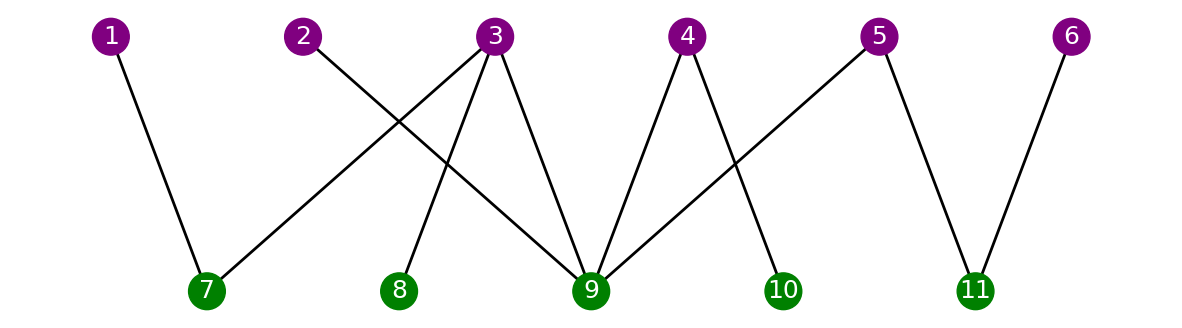

In [30]:
# Sketch of the bipartite graph
m = 6+1
n = 11+1

pos = {}
pos.update((i, (i - m/2, 1)) for i in range(m))
pos.update((i, (i - m - n/2 + 4, 0)) for i in range(m, n)) # the +4 is hard coded in for padding! 

color_dict = {0:'purple',1:'green'}
color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
nx.draw(
    G, 
    with_labels=True, 
    pos=pos, 
    node_size=700, 
    width=2, 
    node_color = color_list, 
    font_size = 18,
    font_color = "white"
)
plt.show()

#### 2.3.1 Maximum number of links L<sub>max</sub> in a bipartite network

The maximum number of links of a bipartite network can be found as
 
$L_{max} = N1 \cdot N2$

, where N1 and N2 represent the cardinality of each respective node set (number of nodes in each partition).

The maximum number of links without the constraint of being bipartite (a complete graph): 

$L_{max} = \frac{N(N-1)}{2}$


For the graph given in the exercise, we have:

In [31]:
N1 = 6
N2 = 5

L_max_bipartite = N1 * N2
print(f"L_max_bipartite = {L_max_bipartite}")

L_max_bipartite = 30


#### 2.3.2 How many links cannot occur compared to a non-bipartite network of size N = N1 + N2

We can calculate the difference between L<sub>max</sub> for the two cases by following the formulae from above:

In [32]:
N = N1 + N2

L_max_complete = int((N * (N-1))/2)
print(f"L_max_complete = {L_max_complete}")

L_max_complete = 55


In [33]:
diff = L_max_complete - L_max_bipartite
print(f"The difference is {diff} more possible links in a complete network.")

The difference is 25 more possible links in a complete network.


#### 2.3.3 Network density when N1 << N2

Fluffy exercise description!

#### 2.3.4 Expression from N1, N2 and k1, k2

Fluffy exercise description!

## Exercises Part 3: Plotting degree distributions

We start by importing the most important libraries

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random 

### 3.1 Binning real numbers

#### 3.1.1 generate random numbers

In [35]:
# Set seed for this session, i.e. make results replicable
np.random.seed(12345)

# Set variables
mu = 2
sigma = 0.125
n = 5000

s_norm = np.random.normal(mu, sigma, n)
print(min(s_norm))
print(max(s_norm))

1.5318305153336111
2.490941005099091


#### 3.1.2 Create binned histogram

In [36]:
histogram = np.histogram(
    s_norm, 
    bins = list(np.arange(
        min(s_norm),
        max(s_norm),
        (max(s_norm)-min(s_norm))/11 # Calculate steps between min and max values
    ))
)
hist, bin_edges = histogram
hist, bin_edges

(array([   7,   38,  198,  591, 1191, 1324,  999,  486,  150,   11],
       dtype=int64),
 array([1.53183052, 1.61902238, 1.70621424, 1.7934061 , 1.88059797,
        1.96778983, 2.05498169, 2.14217355, 2.22936542, 2.31655728,
        2.40374914]))

**Taken from the documentation:**

The function returns two objects:

**hist** : array

    The values of the histogram. See density and weights for a description of the possible semantics. If weights are given, hist.dtype will be taken from weights.

**bin_edges** : array of dtype float

    Return the bin edges (length(hist)+1)

#### 3.1.3 Plot the binned data

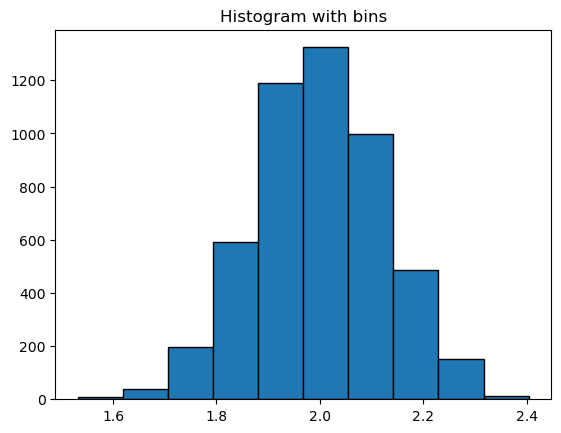

In [37]:
plt.hist(s_norm, bins = bin_edges, edgecolor='black')
plt.title("Histogram with bins")
plt.show()

### 3.2 Binning integers

#### 3.2.1

In [38]:
# Set seed for this session, i.e. make results replicable
np.random.seed(12345)

# Set variables
lambda_ = 10
n = 5000

s_pois = np.random.poisson(lambda_, n)

In [39]:
print(min(s_pois))
print(max(s_pois))
print(len(s_pois))

1
23
5000


#### 3.2.2

In [40]:
v = list(range(min(s_pois), max(s_pois)+1, 1))

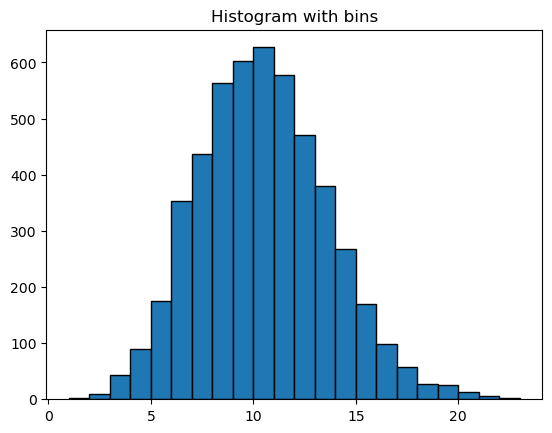

In [41]:
plt.hist(s_pois, bins = v, edgecolor='black')
plt.title("Histogram with bins")
plt.show()

#### 3.2.3

In [42]:
# Create histogram bars for parsing into bar chart
histogram = np.histogram(s_pois, bins = v)
hist, bin_edges = histogram

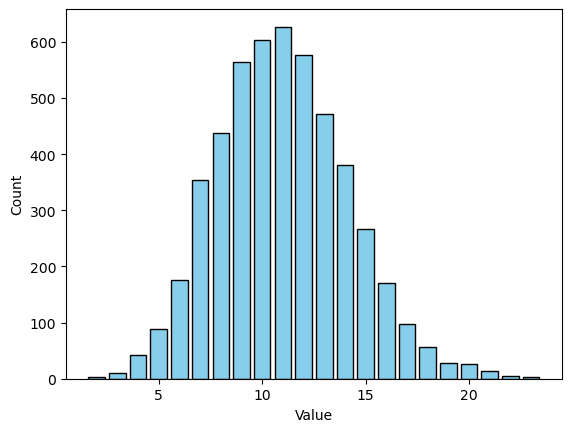

In [43]:
plt.bar(x=v[1:len(v)], height=list(hist), edgecolor='black', color='skyblue')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

### 3.3 Binning and plotting degree distributions

#### 3.3.1 Calculate the probabilty using sample size and average degree

In [44]:
# Calculate p from the sample size, N, and average degree, k.
def calc_p(k, N):
    return k / (N-1)

In [45]:
k = lambda_
N = 5000

p = calc_p(k, N)
p

0.002000400080016003

#### 3.3.2 Eröds-Renyi graph using p

In [46]:
# Create Eröds-Renyi graph using the computed p
G_er = nx.erdos_renyi_graph(n=N, p=p, seed=12345, directed=False)
print(G_er)

Graph with 5000 nodes and 24882 edges


#### 3.3.3 Bar plot

In [47]:
# Compute the degree sequence, i.e. the degree of all nodes in the graph and bin them
degree_sequence = sorted((d for n, d in G_er.degree()), reverse=True)

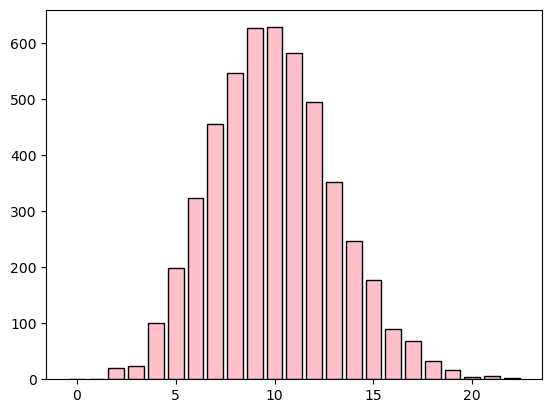

In [48]:
# Use the sequence to create a degree distribution bar plot
plt.bar(*np.unique(degree_sequence, return_counts=True), edgecolor='black', color='pink')
plt.show()

### Part 4: Random networks